In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn import metrics

from operator import itemgetter

/Users/analeegraig/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/analeegraig/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/analeegraig/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/analeegraig/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/analeegraig/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the re

In [2]:
df = pd.read_csv('transformed_dataframe.csv')

In [3]:
df.head()

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.230073,-0.202770,4,1,3,7,5,1.053769,0.880629,0.533895,...,0,0,0,1,0,0,0,0,1,0
1,0.473236,-0.086107,4,1,3,6,8,0.159469,-0.427190,-0.573757,...,0,0,0,1,0,0,0,0,1,0
2,-0.089411,0.081281,3,1,3,7,5,0.987524,0.832191,0.341751,...,0,0,0,1,0,0,0,0,1,0
3,-0.464509,-0.091179,3,1,3,7,5,-1.860986,-0.717817,-0.573757,...,0,0,0,1,1,0,0,0,0,0
4,0.660785,0.386636,3,1,3,8,5,0.954402,0.735316,1.404192,...,0,0,0,1,0,0,0,0,1,0


## Linear Model

In [4]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [6]:
lm = LinearRegression()

In [7]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
predictions_linear = lm.predict(X_test)

### R^2

In [9]:
metrics.r2_score(y_test, predictions_linear)

0.8901128228093489

## Lasso

In [16]:
r2_lasso = []
for alpha in np.linspace(0,1.1,num=20000):
    lasso = linear_model.Lasso(alpha)
    lasso.fit(X_train, y_train)
    predictions_lasso = lasso.predict(X_test)
    r2_num = metrics.r2_score(y_test, predictions_lasso)
    r2_lasso.append([alpha,r2_num])

/Users/analeegraig/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
/Users/analeegraig/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/analeegraig/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [17]:
r2_maximized_lasso = sorted(r2_lasso, key=itemgetter(1))[-1]

In [18]:
r2_maximized_lasso

[0.0006600330016500826, 0.8944579302658434]

In [31]:
print("\nR^2 maximized where:\n    Alpha: {:.5f}\n    R^2: {:.5f}\n".format(r2_maximized_lasso[0], r2_maximized_lasso[1]))


R^2 maximized where:
    Alpha: 0.00066
    R^2: 0.89446



## Ridge

In [13]:
r2_ridge = []
for alpha in np.linspace(0,17,num=20000):
    ridge = linear_model.Ridge(alpha)
    ridge.fit(X_train, y_train)
    predictions_ridge = ridge.predict(X_test)
    r2_num = metrics.r2_score(y_test, predictions_ridge)
    r2_ridge.append([alpha,r2_num])

In [20]:
r2_maximized_ridge = sorted(r2_ridge, key=itemgetter(1))[-1]

In [32]:
r2_maximized_ridge

[17.0, 0.8952267732818933]

In [35]:
print("\nR^2 maximized where:\n    Alpha: {:.5f}\n    R^2: {:.5f}\n".format(r2_maximized_ridge[0], r2_maximized_ridge[1]))


R^2 maximized where:
    Alpha: 17.00000
    R^2: 0.89523



#### Create instance of ridge at max value for alpha

In [23]:
ridge = linear_model.Ridge(alpha=17)

In [24]:
ridge.fit(X_train, y_train)

Ridge(alpha=17, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [25]:
predictions_ridge = ridge.predict(X_test)

In [68]:
ridge_coeffs_df = pd.DataFrame(ridge.coef_,X.columns,columns=['Coefficient'])

In [99]:
ridge_coeffs_abs_df = ridge_coeffs_df.abs().sort_values('Coefficient', ascending=False)

In [102]:
ridge_coeffs_abs_df.head()

,Coefficient
GrLivArea,0.189726
Neighborhood_NridgHt,0.187184
Neighborhood_StoneBr,0.174864
SaleCondition_Partial,0.133011
Neighborhood_Timber,0.130308


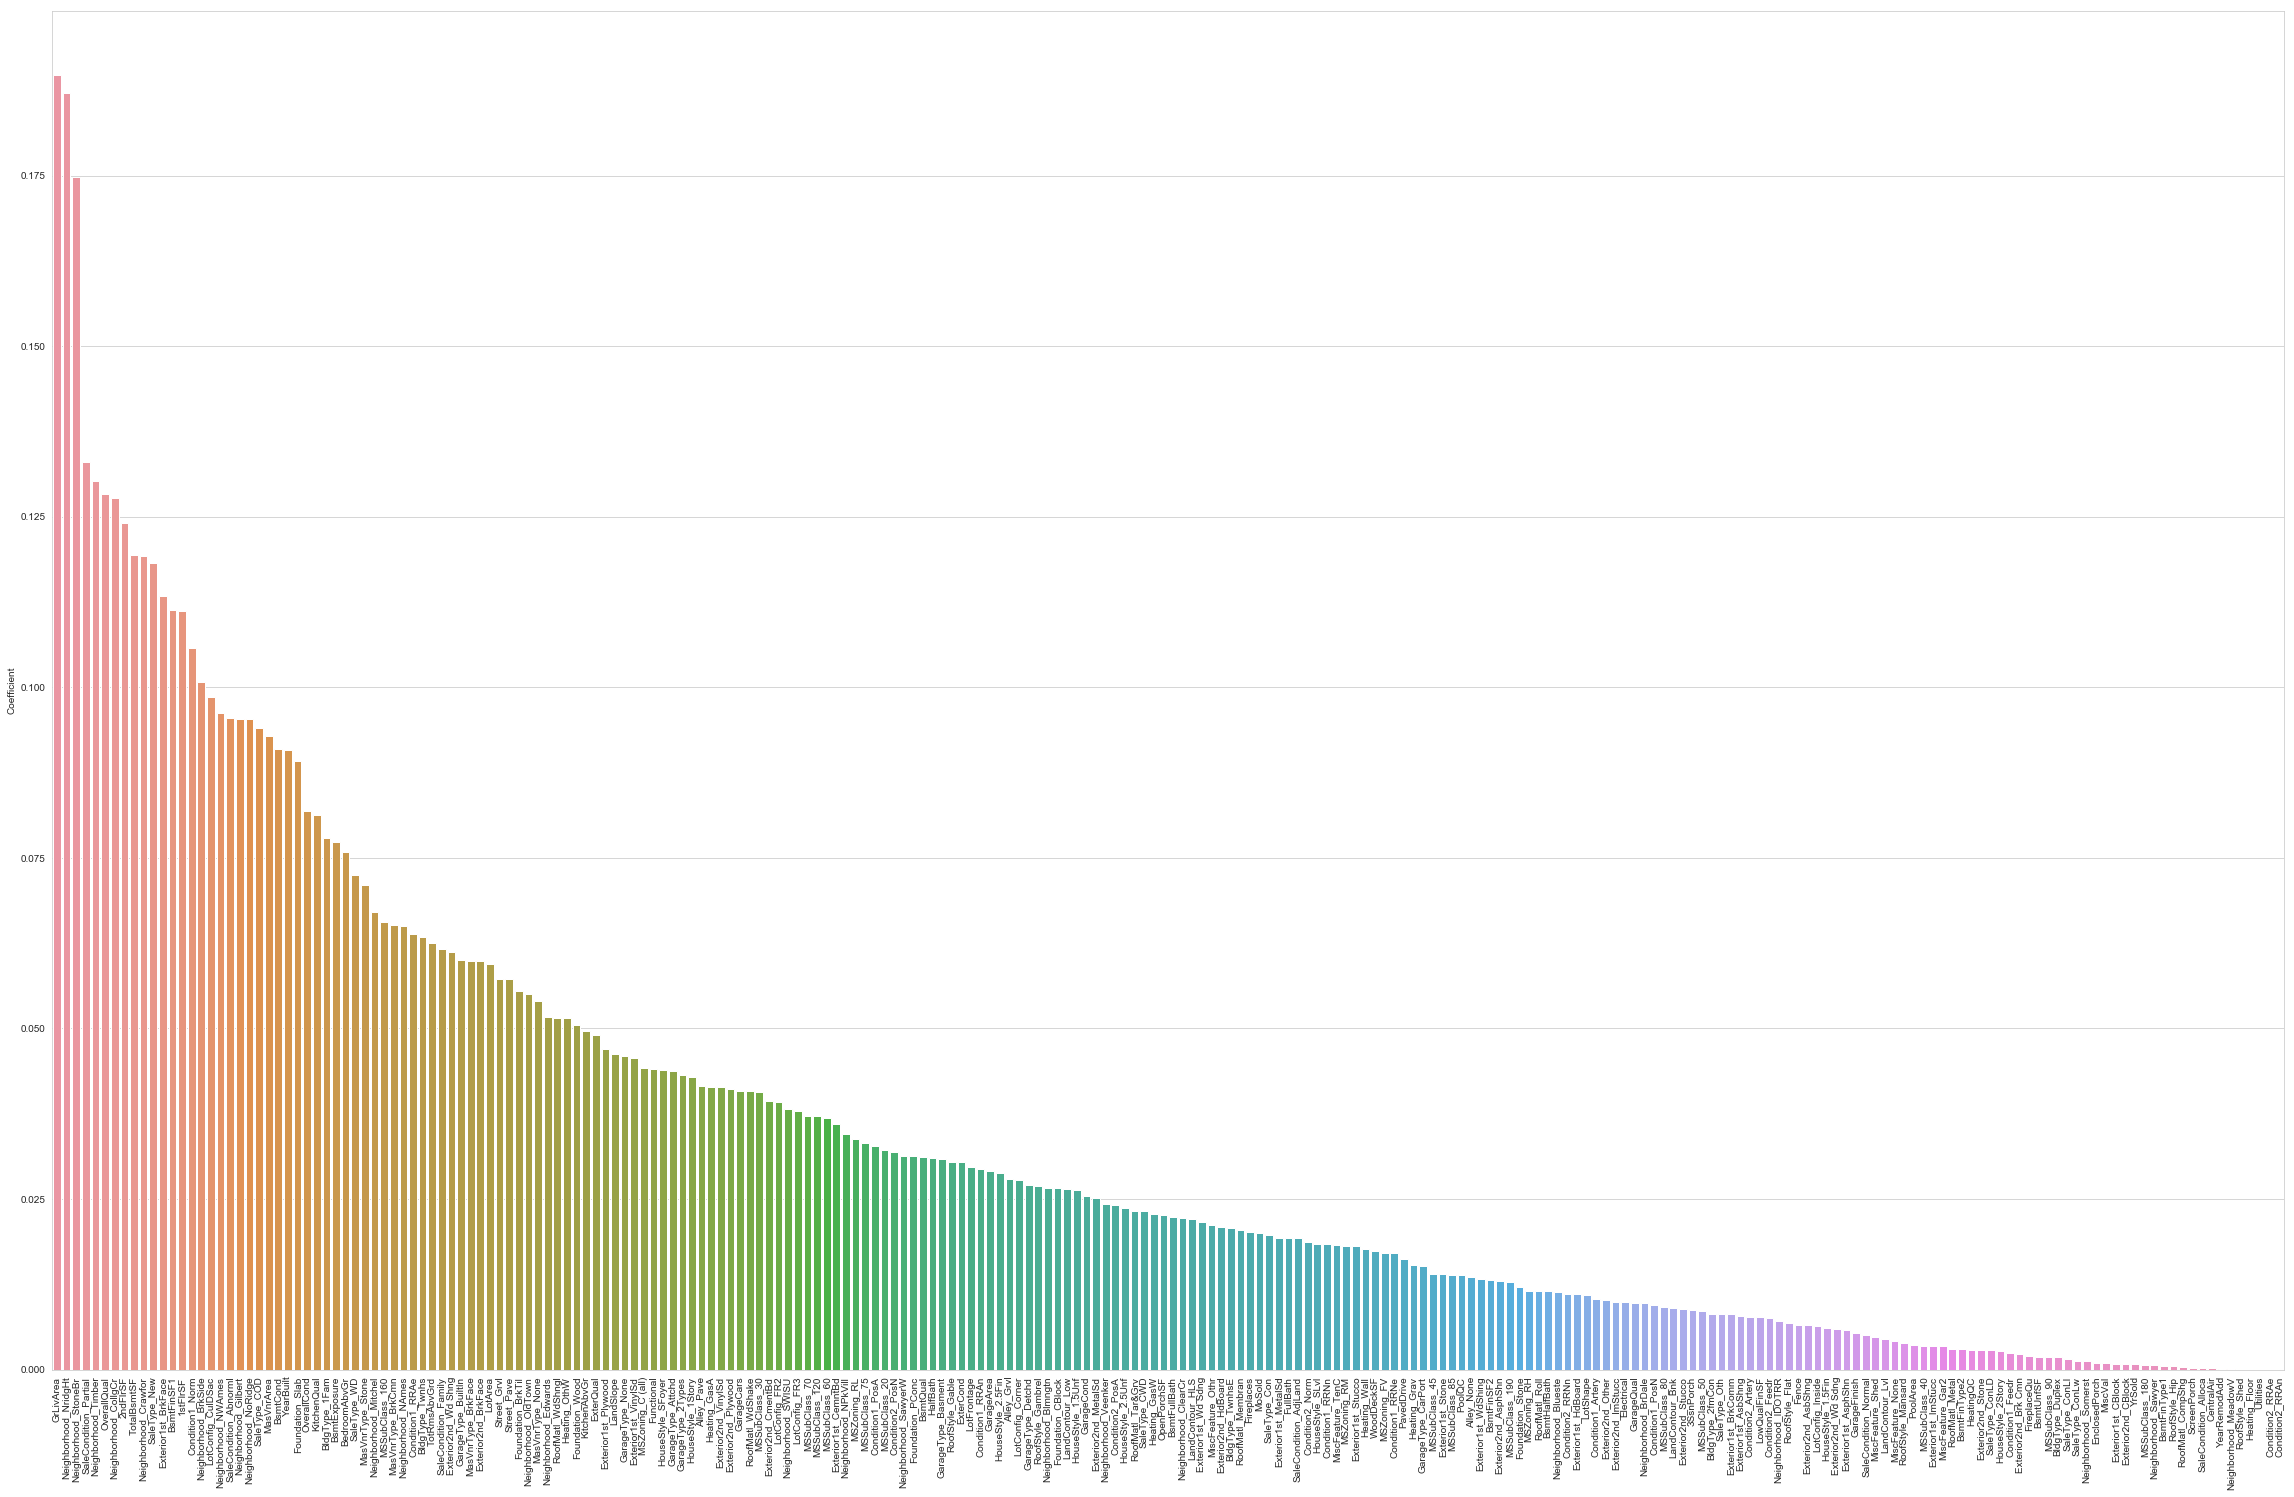

In [101]:
plt.figure(figsize=(40,25))
plt.xticks(rotation=90)
sns.barplot(x=ridge_coeffs_abs_df.index,y='Coefficient',data=ridge_coeffs_abs_df,)

### Compare above with results from lasso

In [103]:
lasso = linear_model.Lasso(alpha=0.00066)

In [104]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.00066, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [105]:
predictions_lasso = lasso.predict(X_test)

In [106]:
lasso_coeffs_df = pd.DataFrame(lasso.coef_,X.columns,columns=['Coefficient'])

In [119]:
lasso_coeffs_abs_df = lasso_coeffs_df.abs().sort_values('Coefficient', ascending=False)

In [122]:
lasso_coeffs_df.sort_values('Coefficient', ascending=False)

,Coefficient
Neighborhood_StoneBr,0.356546
GrLivArea,0.336084
Neighborhood_NridgHt,0.287968
SaleCondition_Partial,0.246792
Neighborhood_Crawfor,0.192934
Exterior1st_BrkFace,0.185916
Foundation_Slab,0.185081
Neighborhood_NoRidge,0.154300
Neighborhood_BrkSide,0.144140
LotConfig_CulDSac,0.142517


In [124]:
lasso_coeffs_abs_df.head(10)

,Coefficient
Neighborhood_StoneBr,0.356546
GrLivArea,0.336084
Neighborhood_NridgHt,0.287968
SaleCondition_Partial,0.246792
Neighborhood_Crawfor,0.192934
Exterior1st_BrkFace,0.185916
Foundation_Slab,0.185081
Street_Grvl,0.181763
Neighborhood_Timber,0.176520
Neighborhood_NoRidge,0.154300


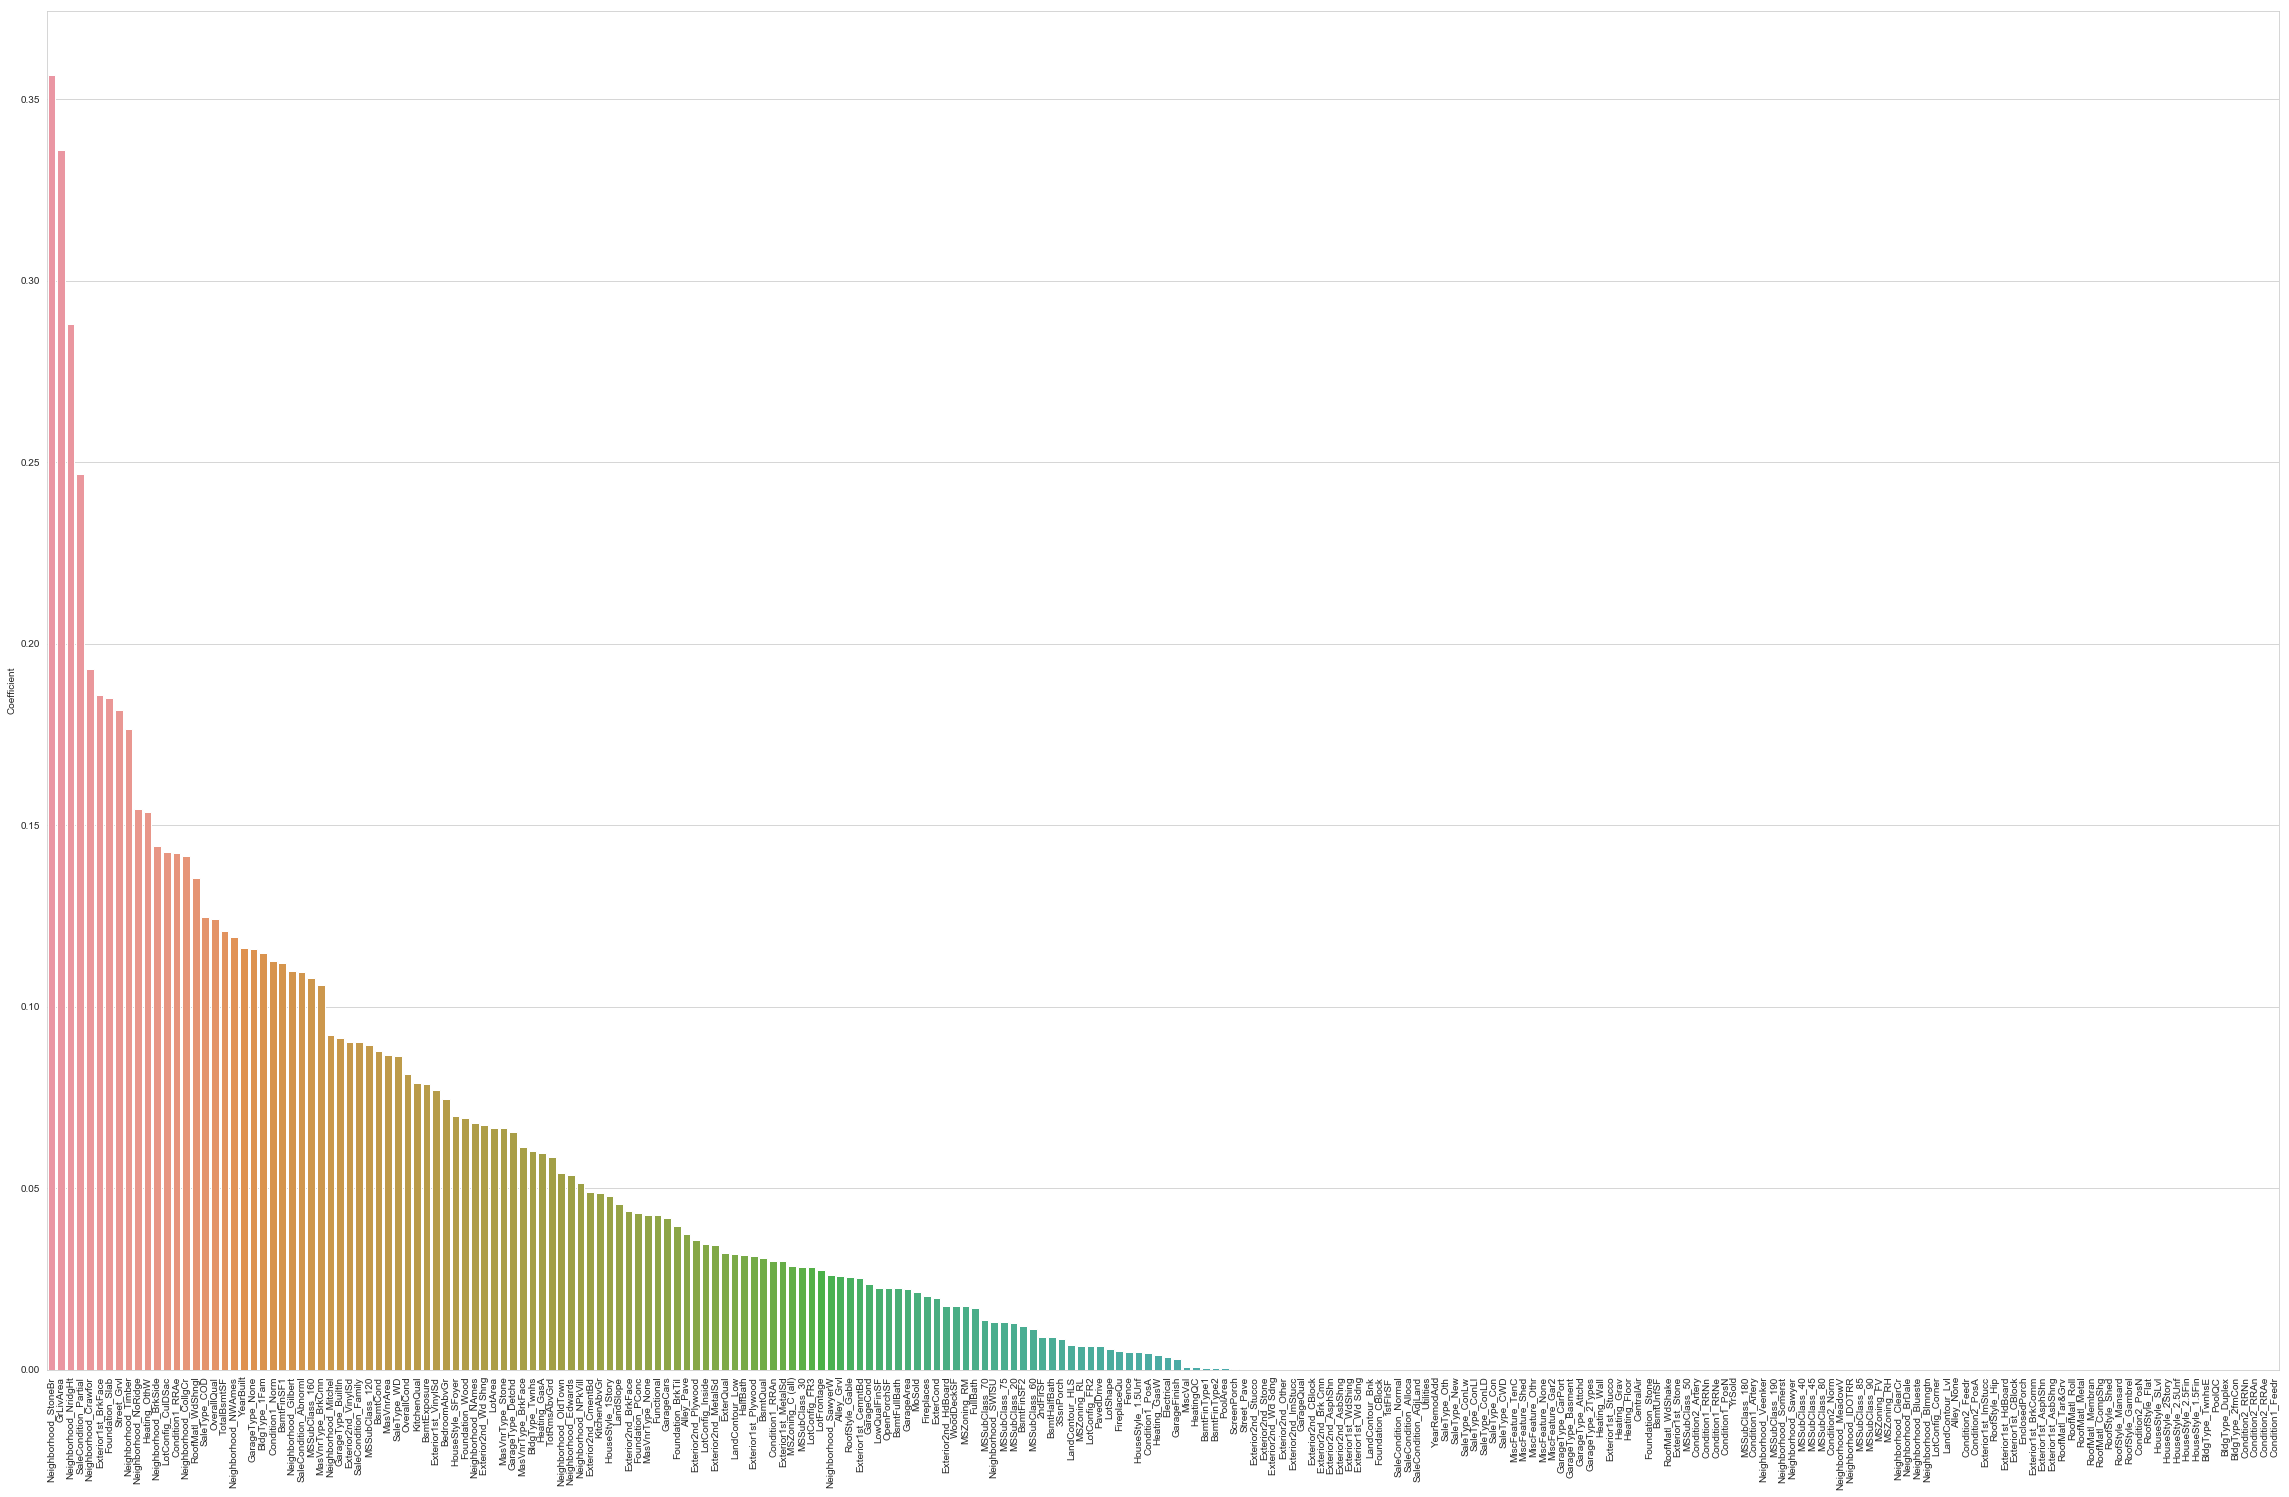

In [109]:
plt.figure(figsize=(40,25))
plt.xticks(rotation=90)
sns.barplot(x=lasso_coeffs_abs_df.index,y='Coefficient',data=lasso_coeffs_abs_df,)

## Comparing top 10 most important variables

### Most important for Lasso

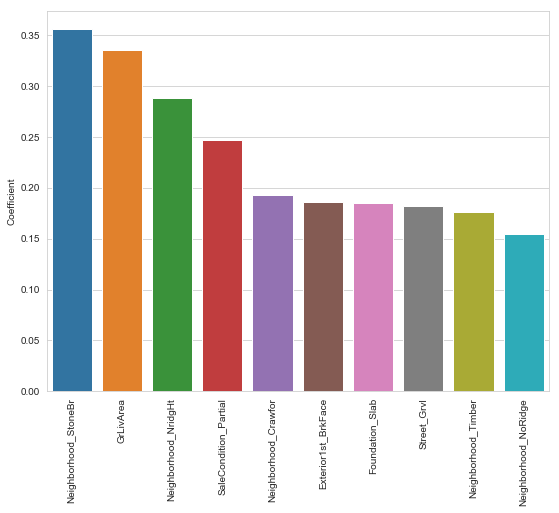

In [126]:
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.barplot(x=lasso_coeffs_abs_df[:10].index,y='Coefficient',data=lasso_coeffs_abs_df[:10],)

### Most important for Ridge

In [127]:
ridge_coeffs_abs_df = ridge_coeffs_df.abs().sort_values('Coefficient', ascending=False)

In [129]:
ridge_coeffs_df.sort_values('Coefficient', ascending=False)

,Coefficient
GrLivArea,0.189726
Neighborhood_NridgHt,0.187184
Neighborhood_StoneBr,0.174864
SaleCondition_Partial,0.133011
Neighborhood_Timber,0.130308
OverallQual,0.128415
Neighborhood_CollgCr,0.127715
2ndFlrSF,0.124087
TotalBsmtSF,0.119378
Neighborhood_Crawfor,0.119255


In [130]:
ridge_coeffs_abs_df.head(10)

,Coefficient
GrLivArea,0.189726
Neighborhood_NridgHt,0.187184
Neighborhood_StoneBr,0.174864
SaleCondition_Partial,0.133011
Neighborhood_Timber,0.130308
OverallQual,0.128415
Neighborhood_CollgCr,0.127715
2ndFlrSF,0.124087
TotalBsmtSF,0.119378
Neighborhood_Crawfor,0.119255


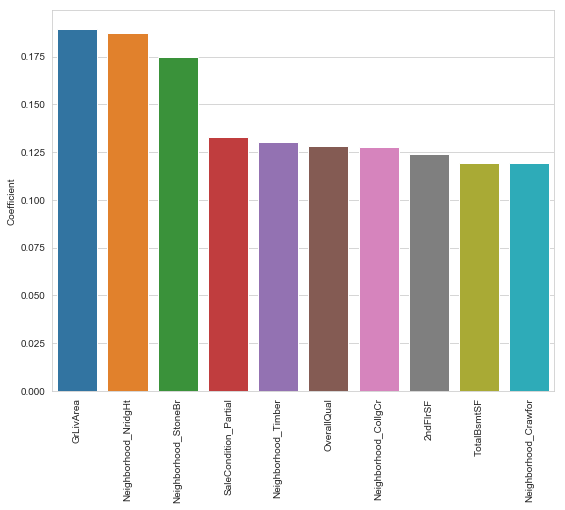

In [132]:
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.barplot(x=ridge_coeffs_abs_df[:10].index,y='Coefficient',data=ridge_coeffs_abs_df[:10],)